<a href="https://colab.research.google.com/github/pdrzxzz/world-population-growth-rate-in-R/blob/main/world-population-growth-rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "nortest"   "plotly"    "ggplot2"   "dplyr"     "stats"     "graphics" 
 [7] "grDevices" "utils"     "datasets"  "methods"   "base"

  mean_pop_2023 mean_pop_2024 mean_growth median_pop_2023 median_pop_2024
1       2615341       2665356     2.00781         1364431         1379998
  median_growth sd_growth var_growth
1         1.975  1.214472   1.474942
[1] "Negative outlier cities:"
            City       Country     Continent Population..2024.
49      New York United States North America           7931147
130  Los Angeles United States North America           3748640
196      Chicago United States North America           2590002
351 Philadelphia United States North America           1533916
637     San Jose United States North America            932636
    Population..2023. Growth.Rate
49            8133522       -2.49
130           3785439       -0.97
196           2627520       -1.43
351           1550587       -1.07
637            951934       -2.03
[1] "Positive outlier cities:"
              City      Country Continent Population..2024. Population..2023.
48   Dar Es Salaam     Tanzania    Africa           8161

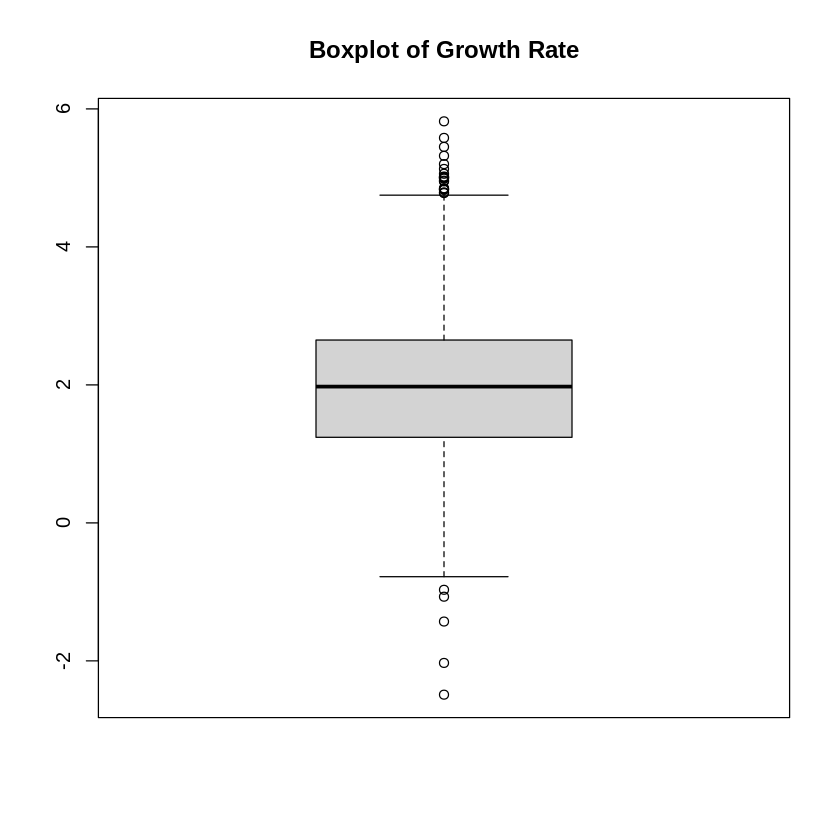


Anderson-Darling test (with outliers):

	Anderson-Darling normality test

data:  data$Growth.Rate
A = 1.9341, p-value = 6.198e-05


Anderson-Darling test (without positive outliers):

	Anderson-Darling normality test

data:  cleaned_data$Growth.Rate
A = 0.68548, p-value = 0.07318



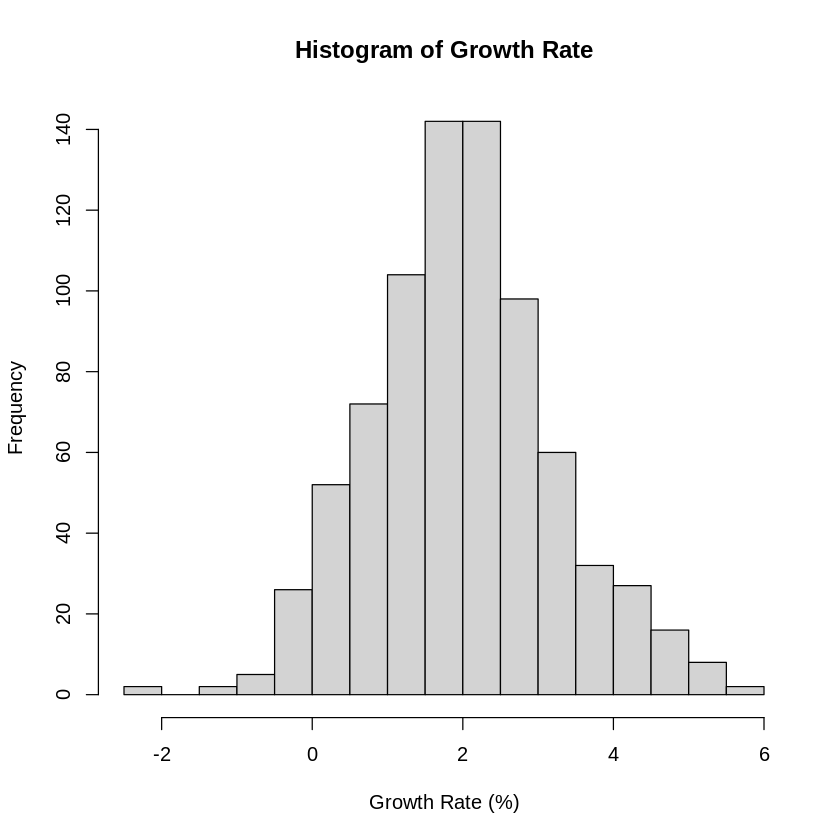

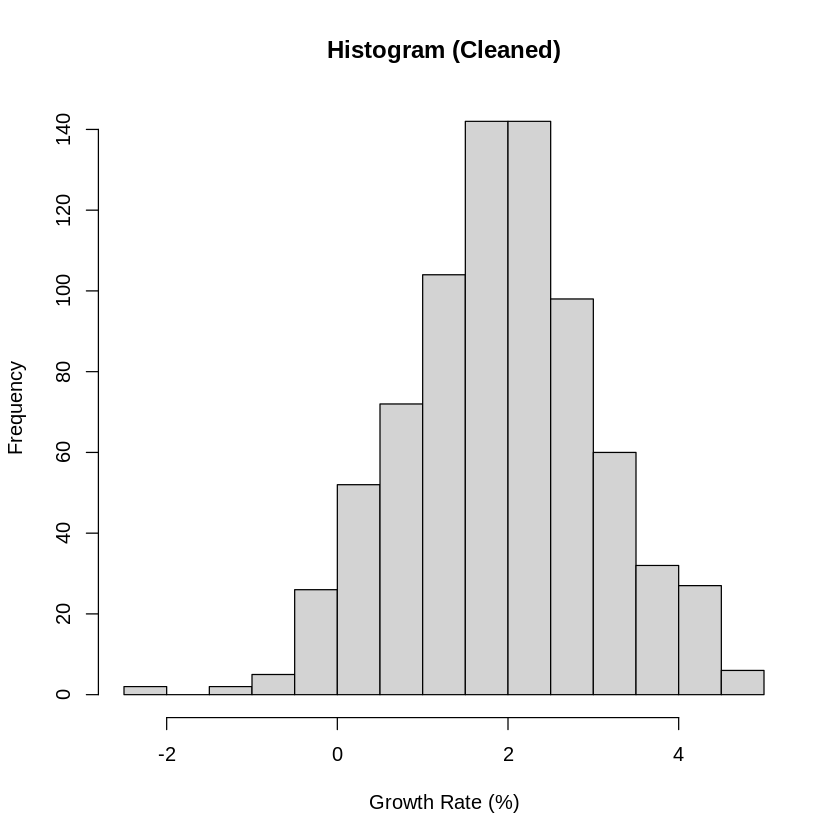


T-test: Is America's growth rate lower than other continents?

	Welch Two Sample t-test

data:  non_american_data$Growth.Rate and american_data$Growth.Rate
t = 12.213, df = 236.69, p-value < 2.2e-16
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.8607648       Inf
sample estimates:
mean of x mean of y 
 2.089829  1.094480 


T-test: Is Japan's growth rate lower than other countries?

	Welch Two Sample t-test

data:  japan_data$Growth.Rate and non_japan_data$Growth.Rate
t = -44.54, df = 86.752, p-value < 2.2e-16
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -2.047059
sample estimates:
 mean of x  mean of y 
-0.1733333  1.9531012 



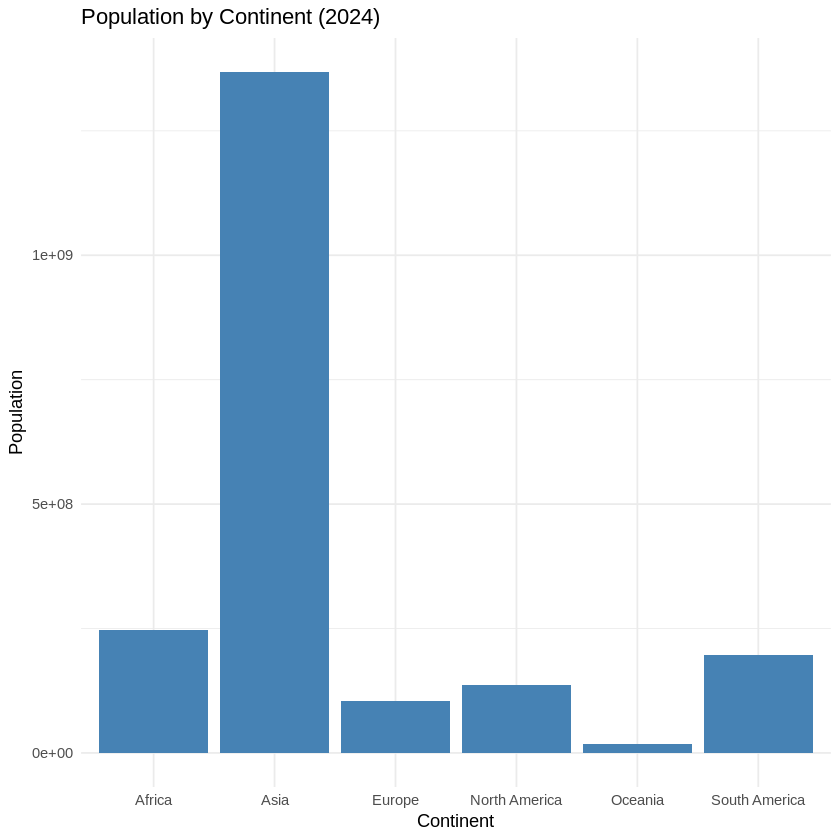

In [5]:
####### REQUIRED PACKAGES INSTALLATION AND LOADING #######
packages <- c("dplyr", "ggplot2", "plotly", "nortest")
installed <- packages %in% rownames(installed.packages())
if (any(!installed)) install.packages(packages[!installed])
lapply(packages, library, character.only = TRUE)


####### LOAD DATASET #######
# Reading dataset from local CSV file 'world-population-growth-rate.csv'
data <- read.csv("world-population-growth-rate.csv")


####### DATA PREPROCESSING #######
# Convert Growth Rate from decimal fraction to percentage (e.g., 0.02 -> 2%)
data <- data %>%
  mutate(Growth.Rate = Growth.Rate * 100)

# Fix typo in Continent column ("Oceana" should be "Oceania")
data$Continent[data$Continent == "Oceana"] <- "Oceania"

# Remove rows where Continent column is empty or missing
data <- filter(data, Continent != "")


####### DESCRIPTIVE STATISTICS #######
# Calculate summary statistics for population (2023 and 2024) and growth rate
summary_stats <- data %>%
  summarise(
    mean_pop_2023 = mean(Population..2023.),
    mean_pop_2024 = mean(Population..2024.),
    mean_growth = mean(Growth.Rate),
    median_pop_2023 = median(Population..2023.),
    median_pop_2024 = median(Population..2024.),
    median_growth = median(Growth.Rate),
    sd_growth = sd(Growth.Rate),
    var_growth = var(Growth.Rate)
  )
print(summary_stats)


####### BOXPLOT AND OUTLIERS ANALYSIS #######
# Plot boxplot of growth rate to visualize distribution and detect outliers
boxplot(data$Growth.Rate, main = "Boxplot of Growth Rate")

# Extract outliers from boxplot stats
outliers <- boxplot.stats(data$Growth.Rate)$out

# Separate outliers into negative and positive groups
neg_outliers <- outliers[outliers < 0]
pos_outliers <- outliers[outliers >= 0]

# Get rows corresponding to negative outliers
neg_outlier_data <- subset(data, Growth.Rate %in% neg_outliers)

# Get rows corresponding to positive outliers
pos_outlier_data <- subset(data, Growth.Rate %in% pos_outliers)

# Print cities with negative outliers (growth rates significantly below average)
print("Negative outlier cities:")
print(neg_outlier_data)

# Print cities with positive outliers (growth rates significantly above average)
print("Positive outlier cities:")
print(pos_outlier_data)


####### HISTOGRAM OF GROWTH RATE DISTRIBUTION #######
# Visualize distribution of growth rates with histogram (including outliers)
hist(data$Growth.Rate, breaks = 20, main = "Histogram of Growth Rate", xlab = "Growth Rate (%)")


####### NORMALITY TEST WITH OUTLIERS #######
# Perform Anderson-Darling test for normality on growth rate data including outliers
cat("\nAnderson-Darling test (with outliers):\n")
print(ad.test(data$Growth.Rate))


####### REMOVE POSITIVE OUTLIERS AND REANALYZE #######
# Filter out positive outliers to clean data and check impact on normality
cleaned_data <- filter(data, !(Growth.Rate %in% pos_outliers))

# Perform Anderson-Darling test again on cleaned data without positive outliers
cat("\nAnderson-Darling test (without positive outliers):\n")
print(ad.test(cleaned_data$Growth.Rate))

# Plot histogram of cleaned growth rate data (outliers removed)
hist(cleaned_data$Growth.Rate, breaks = 20, main = "Histogram (Cleaned)", xlab = "Growth Rate (%)")


####### POPULATION BY CONTINENT #######
# Bar chart showing total population per continent in 2024 after cleaning
ggplot(cleaned_data, aes(x = Continent, y = Population..2024.)) +
  geom_col(fill = "steelblue") +
  theme_minimal() +
  labs(title = "Population by Continent (2024)", y = "Population", x = "Continent")


####### HYPOTHESIS TESTING #######

##### Hypothesis 1: Is growth rate in Americas lower than other continents? #####
american_data <- filter(cleaned_data, Continent %in% c("South America", "North America"))
non_american_data <- filter(cleaned_data, !Continent %in% c("South America", "North America"))

cat("\nT-test: Is America's growth rate lower than other continents?\n")
print(t.test(non_american_data$Growth.Rate, american_data$Growth.Rate, alternative = "greater"))


##### Hypothesis 2: Is Japan's growth rate lower than other countries? #####
japan_data <- filter(cleaned_data, Country == "Japan")
non_japan_data <- filter(cleaned_data, Country != "Japan")

cat("\nT-test: Is Japan's growth rate lower than other countries?\n")
print(t.test(japan_data$Growth.Rate, non_japan_data$Growth.Rate, alternative = "less"))
